## General information about this notebook

This notebook series has been initiated by the Data Management Project (INF) within the TR-172 ["ArctiC Amplification: Climate Relevant Atmospheric and SurfaCe Processes, and Feedback Mechanisms" (AC)³](http://www.ac3-tr.de/) funded by the German Research Foundation (Deutsche Forschungsgemeinschaft, DFG)

Authors of this notebook: 
 - Matthias Buschmann, [Institute of Environmental Physics](http://www.iup.uni-bremen.de), University of Bremen, Germany, m_buschmann@iup.physik.uni-bremen.de
 - Jonas Hachmeister, [Institute of Environmental Physics](http://www.iup.uni-bremen.de), University of Bremen, Germany, jonas_h@iup.physik.uni-bremen.de
 - Hanno Müller, [Institute for Meteorology](https://www.physgeo.uni-leipzig.de/institut-fuer-meteorologie), Leipzig University, Germany, hanno.mueller@uni-leipzig.de
 
Github repository: https://github.com/ac3-tr/ac3-notebooks

This notebook is licensed under the [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/ "CC-BY-4.0")

# Dataset description

**Title:** Aircraft measurements of up- and downward irradiances over Arctic sea ice during the ACLOUD campaign     

**Authors** Jäkel, Evelyn; Ehrlich, André; Schäfer, Michael; Wendisch, Manfred 

**Description** During the ACLOUD (Arctic CLoud Observations Using airborne measurements during polar Day ) campaign in May / June 2017 spectral up- and downward irradiances were measured over the Arctic sea ice using the Spectral Modular Airborne Radiation measurement sysTem (SMART-Albedometer). The data set gives time series of irradiances measured along the flight path for three different wavelengths (555 nm, 645 nm, and 1640 nm) on different days and for different illumination conditions. The surface albedo can be directly calculated from the up- and downward irradiances. From these data set a temporal change of the sea ice albedo and a dependence on the illumination condition can be observed.

**Year** 2018       

**Institutes** Universität Leipzig  

**DOI** https://doi.org/10.1594/PANGAEA.891588    

**License**    [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/ "CC-BY-4.0")

## Contents of this notebook

This notebook provides a short example of reading and plotting spectral irradiances from the ACLOUD campaign. The radiative fluxes are visualized by
* plotting the solar irradiances against the time 
* plotting some downward spectral irradiances on a spatial map 
* plotting sea ice albedos at 555 nm.



## Import relevant modules

The following packages are needed for the execution of this notebook:
_matplotlib_, _numpy_, _cartopy_


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy, os
import pangaeapy as pgp
%matplotlib inline

## Pre-processing of the imported data
Datasets can be downloaded via the list of datasets behind the DOI listed above and saved in the current working directory of this notebook. After checking the headersize of the ASCII file, the table can be read as a NumPy record array. Here, three datasets from the beginning, the mid and the end of the campaign are read in. The print statement checks the loaded fields in the recarray.

In [7]:
datafolder = './'
data_begin_of_acloud = np.recfromtxt(os.path.join(datafolder, 'ACLOUD_P5_2017_1705230601_irradiance.tab'),
                                     skip_header=24, delimiter='\t', names=True)
data_mid_of_acloud = np.recfromtxt(os.path.join(datafolder, 'ACLOUD_P5_2017_1706081401_irradiance.tab'),
                                   skip_header=24, delimiter='\t', names=True)
data_end_of_acloud = np.recfromtxt(os.path.join(datafolder, 'ACLOUD_P5_2017_1706262401_irradiance.tab'),
                                   skip_header=24, delimiter='\t', names=True)

print (data_begin_of_acloud.dtype.names)
print (data_mid_of_acloud.dtype.names)
print (data_end_of_acloud.dtype.names)

('Time_s', 'Longitude', 'Latitude', 'Altitude_m', 'Ed_555_Wm2nm', 'Eu_555_Wm2nm', 'Ed_645_Wm2nm', 'Eu_645_Wm2nm', 'Ed_1640_Wm2nm', 'Eu_1640_Wm2nm', 'Flag')
('Time_s', 'Longitude', 'Latitude', 'Altitude_m', 'Ed_555_Wm2nm', 'Eu_555_Wm2nm', 'Ed_645_Wm2nm', 'Eu_645_Wm2nm', 'Ed_1640_Wm2nm', 'Eu_1640_Wm2nm', 'Flag')
('Time_s', 'Longitude', 'Latitude', 'Altitude_m', 'Ed_555_Wm2nm', 'Eu_555_Wm2nm', 'Ed_645_Wm2nm', 'Eu_645_Wm2nm', 'Ed_1640_Wm2nm', 'Eu_1640_Wm2nm', 'Flag')


Alternative data can be accessed via pangaeapy. Go to the landing page and select the data sets of interest, here:
- https://doi.org/10.1594/PANGAEA.891576
- https://doi.org/10.1594/PANGAEA.891581
- https://doi.org/10.1594/PANGAEA.891586

Then load them and extract the data from them.

In [15]:
ds1 = pgp.PanDataSet(891576, enable_cache=True)
data_begin_of_acloud = ds1.data
# skip loading step for the next two data sets
data_mid_of_acloud = pgp.PanDataSet(891581, enable_cache=True).data
data_end_of_acloud = pgp.PanDataSet(891586, enable_cache=True).data

[INFO] Cache directory set to: E:\tmp\pangaeapy_cache
[INFO] To change the cache directory permanently, edit: C:\Users\Johannes\.config\pangaeapy\config.toml
[INFO] Cache directory set to: E:\tmp\pangaeapy_cache
[INFO] To change the cache directory permanently, edit: C:\Users\Johannes\.config\pangaeapy\config.toml
[INFO] Cache directory set to: E:\tmp\pangaeapy_cache
[INFO] To change the cache directory permanently, edit: C:\Users\Johannes\.config\pangaeapy\config.toml


The sea ice albedo can be calculated easily at 555 nm by dividing the upward spectral irradiance by the downward spectral irradiance.

In [7]:
albedo_555nm_begin = data_begin_of_acloud.Eu_555/data_begin_of_acloud.Ed_555
albedo_555nm_mid = data_mid_of_acloud.Eu_555/data_mid_of_acloud.Ed_555
albedo_555nm_end = data_end_of_acloud.Eu_555/data_end_of_acloud.Ed_555

## Plotting example
As an overview, the data fields can be plotted against flight time. Time is converted from seconds to hours.

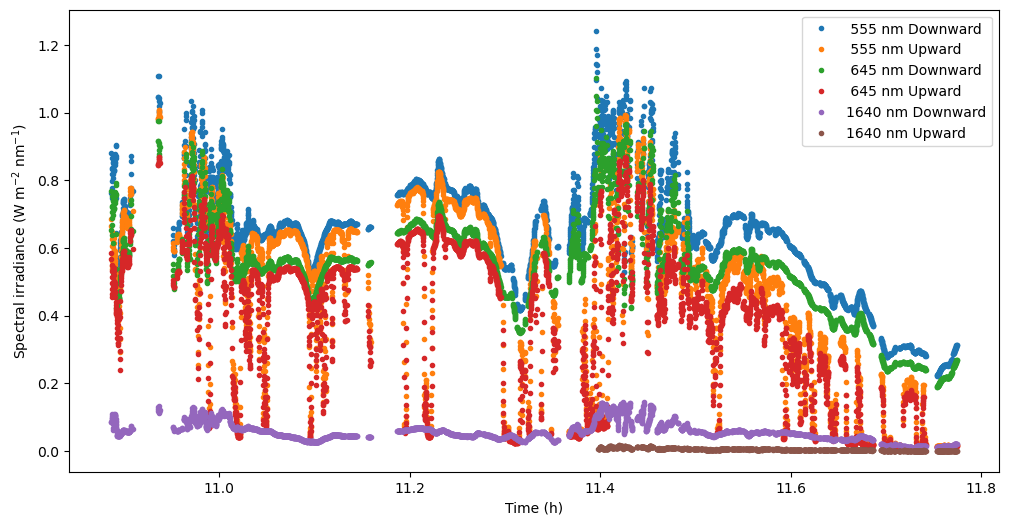

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylabel('Spectral irradiance (W m$^{-2}$ nm$^{-1}$)')
ax.set_xlabel('Time (h)')
ax.plot(data_begin_of_acloud["Time sec"]/3600.0, data_begin_of_acloud.Ed_555, '.', label=' 555 nm Downward')
ax.plot(data_begin_of_acloud["Time sec"]/3600.0, data_begin_of_acloud.Eu_555, '.', label=' 555 nm Upward')
ax.plot(data_begin_of_acloud["Time sec"]/3600.0, data_begin_of_acloud.Ed_645, '.', label=' 645 nm Downward')
ax.plot(data_begin_of_acloud["Time sec"]/3600.0, data_begin_of_acloud.Eu_645, '.', label=' 645 nm Upward')
ax.plot(data_begin_of_acloud["Time sec"]/3600.0, data_begin_of_acloud.Ed_1640, '.', label='1640 nm Downward')
ax.plot(data_begin_of_acloud["Time sec"]/3600.0, data_begin_of_acloud.Eu_1640, '.', label='1640 nm Upward')
ax.legend(loc='upper right')
plt.show()

Using the Cartopy module, the data can be plotted as a function of latitude and longitude. An additional Natural Earth feature of Cartopy is used to show the Svalbard landmass with a black facecolor. For each dataset a distinct plot can be made that shows the values of the corresponding data on the attached colorbar. A different colormap was chosen for the second plot to distinguish between the separat data products.

In [11]:
land10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='None', facecolor='k')

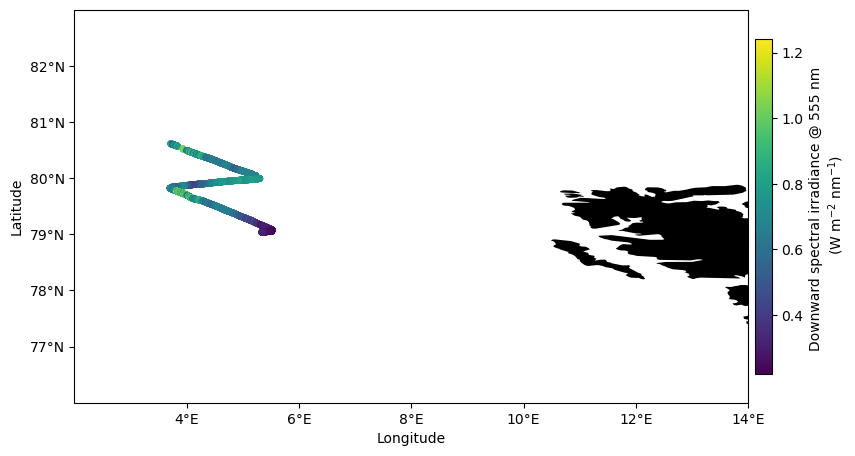

In [12]:
fig = plt.figure(figsize=(9, 6))
ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree()) #Orthographic(0, 90))
ax1.add_feature(land10m)
ax1.set_extent((2,14,76,83), crs=ccrs.PlateCarree())
sc = ax1.scatter(data_begin_of_acloud.Longitude, data_begin_of_acloud.Latitude, s=15, c=data_begin_of_acloud.Ed_555, transform=ccrs.PlateCarree())
ax1.set_xticks([4, 6, 8, 10, 12, 14], crs=ccrs.PlateCarree())
ax1.set_yticks(range(77,83), crs=ccrs.PlateCarree())
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
cb = fig.colorbar(sc, ax=ax1, fraction=0.024, pad=0.01)
cb.set_label('Downward spectral irradiance @ 555 nm \n (W m$^{-2}$ nm$^{-1}$)')
plt.show()

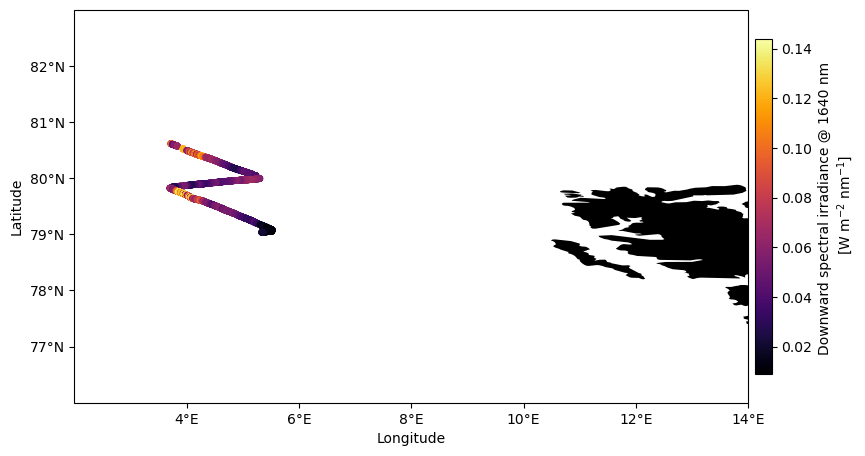

In [13]:
fig = plt.figure(figsize=(9, 6))
ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree()) #Orthographic(0, 90))
land10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='None', facecolor='k')
ax1.add_feature(land10m)
ax1.set_extent((2,14,76,83), crs=ccrs.PlateCarree())
sc = ax1.scatter(data_begin_of_acloud.Longitude, data_begin_of_acloud.Latitude, s=15, c=data_begin_of_acloud.Ed_1640, transform=ccrs.PlateCarree(), cmap='inferno')
ax1.set_xticks([4, 6, 8, 10, 12, 14], crs=ccrs.PlateCarree())
ax1.set_yticks(range(77,83), crs=ccrs.PlateCarree())
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
cb = fig.colorbar(sc, ax=ax1, fraction=0.024, pad=0.01)
cb.set_label('Downward spectral irradiance @ 1640 nm \n [W m$^{-2}$ nm$^{-1}$]')
plt.show()

To visualize the reduction of the sea ice albedo over the time of the ACLOUD campaign, histograms of the sea ice albedo at 555 nm from different research flights can be plotted. The ACLOUD campaign took place during the melt pond season and the following figure shows the shift from higher sea ice albedos during the research flight from 08 June 2017 to lower sea ice albedos during the research flight from 26 June 2017.

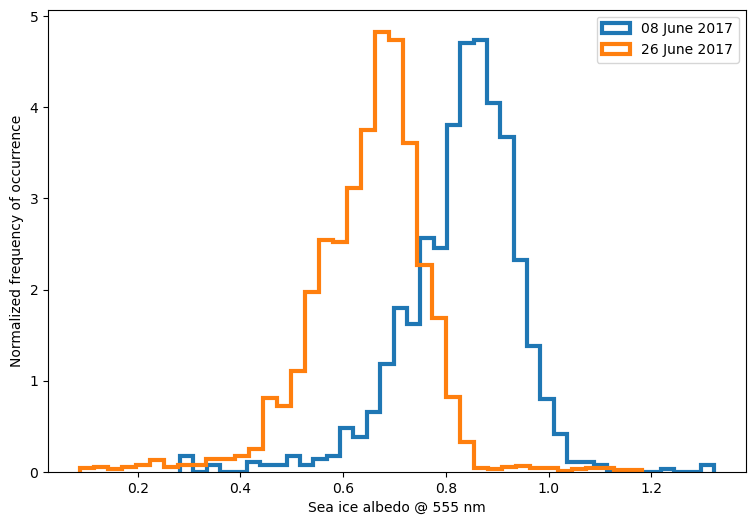

In [14]:
fig,ax = plt.subplots(figsize=(9,6))
ax.hist(albedo_555nm_mid,bins=40,linewidth=3,density=True,histtype='step',label='08 June 2017')
ax.hist(albedo_555nm_end,bins=40,linewidth=3,density=True,histtype='step',label='26 June 2017')
ax.set_xlabel('Sea ice albedo @ 555 nm')
ax.set_ylabel('Normalized frequency of occurrence')
ax.legend()
plt.show()